
# Project: NO-SHOW APPOINTMENT DATA ANALYSIS

## Table of Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains medical appointment records of patients in a hospital in Brazil. In this dataset, I would be analyzing the factors that contribute to patients either showing up or not for their already scheduled appointment. The columns included in this dataset include; Patient Id: This column is the unique identifier for all patients. Appointment Id: This column is the unique identifier for all appointments. Gender: This column helps to identify the sex of the patient, female or male. Scheduled Day: This column tells us on what day the patient set up his or her appointment. AppointmentDay: tells us the day the clinic approved for the patient to show up. Age: this column tells us the age of the patient. Neighbourhood: this column tells us the neighbourhood the patient resides in. Scholarship: This column indicates whether or not the patient is enrolled in the Brazilian welfare program. Hypertension: This column indicates whether the patient is hypertensive or not. Diabetes: This column indicates whether the patient is diabetic or not. Alcoholism: This column indicates whether or not the patient is an alcoholic. Handicap: This column indicates whether or not the patient is handicapped. SMS received: This column indicates whether or not the patient received an SMS reminder for his or her appointment. No show: This column indicates whether the patient actually showed up for his or her appointment. Please, note that No in the No show column indicate that the patient did show up and Yes indicates otherwise.


### Question(s) for Analysis
From this dataset, I would be answering the following questions:
1. What is the proportion of male to female patients? 
2. The proportion of male and female patients that showed up for their appointment to those that did not.
3. Does the difference in schedule day and appointment day affects how patients showed up for their appointment?
4. Whether SMS sent contributed to patients showing up for their appointment or not.



In [5]:
#import all libraries necessary for this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The numpy library would help in performing calculations
The pandas library would be used to manipulate and analyze data
The matplotlib library would be used to build visualizations

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [8]:
# Load your data with a function for ease. Perform operations to
#inspect data
def path(arg):
       df0 = pd.read_csv(arg)
       return df0
df = path('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

From the above displayed dataset, i would like to remove the time associated with the Scheduled day and appointment day
columns, so that we are left with just the day, month, and year.

In [8]:
#split schedule day and appointment day columns
splitcolumns = ['ScheduledDay', 'AppointmentDay']
for s in splitcolumns:
    df[s] = df[s].apply(lambda x:x.split('T')[0])

In [9]:
#to confirm the changes we have made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We have successfully removed the time from the Schedule day and Appointment day columns.

In [23]:
#let's see the number of rows and columns we would be working with
print(df.shape)
    

(110327, 14)


There are 110,327 rows and 14 columns

In [5]:
#let's check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the above, we can see that there are no null values, this simply means that all cells are filled with values.

The Patient_id columns is a float data type, while the Appointment_id is an integer, they are both not carrying the 
wrong data types and should both be changed to object as its not supposed to be calculated. 
The Scheduled day and Appointment day columns are strings and because they both contain date, they should be 
date_time data type, instead.

In [14]:
#Converting Patient_id and Appointment_id to string data type.
df['PatientId']= df.PatientId.astype(object)
df['AppointmentID'] = df.AppointmentID.astype(object)
#Converting Scheduled_day and Appointment_day to date time data type
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])


In [15]:
#let's confirm that those columns are carrying the appropriate data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  object        
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), obje

From taking a look at the columns above, the column names are not in the same format, so it is ideal to rename them 
for ease to callout.

In [16]:
df.rename(columns = {'PatientId': 'Patient_id','AppointmentID': 'Appointment_id', 'ScheduledDay': 'Scheduled_day', 'AppointmentDay': 'Appointment_day', 'Handcap': 'Handicap', 'No-show': 'No_show'},inplace = True)
df.head(1)

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


It is necessary to get to know the statistical position of all numerical columns

In [17]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From, the above we get to notice that we have the minimum age of a patient as -1, and that was definitely wrongly 
done as the age is not realistic. We also discovered that for the handicap column, there are figures that are above 
1, that is also not normal as we should have either 1 or 0 figures because they represent a boolean data type. 
Those columns would be dropped as they have the tendency of affecting our analysis.

In [18]:
#let's drop the values now from the handicap and age columns
df.drop(df[(df['Age'] < 0)]. index, inplace = True)
df.drop(df[(df['Handicap'] > 1)]. index, inplace = True)
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


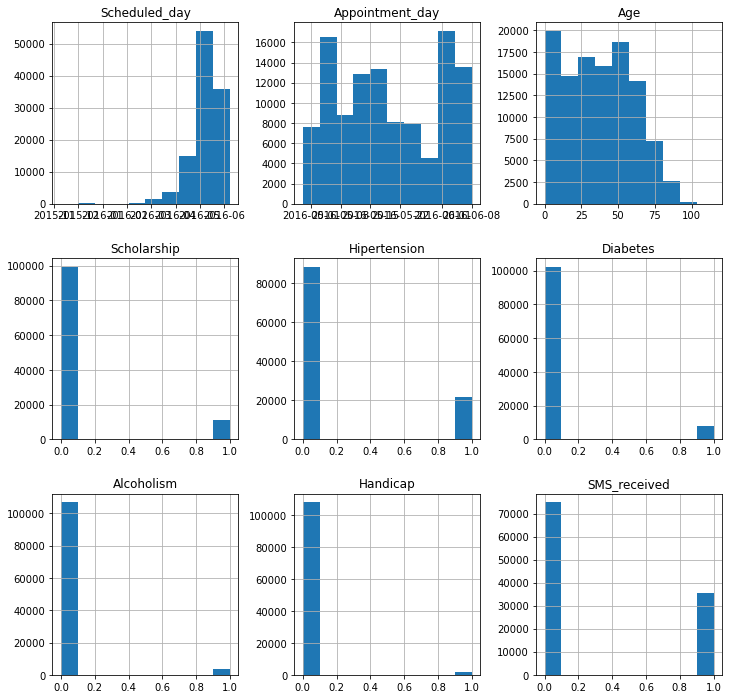

In [26]:
#let's take a look at all the dataset using histogram
df.hist(figsize = (12,12));

Fron this chart above, we can see that we have more people did not get the scholarship, are not hypertensive, are
not diabetic, alcoholic, handicapped, and didnt receive the SMS.
Most of the patients are also below 5o years of age. The scheduled day column is skewed to the left

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: What is the proportion of male to female patients

In [29]:
#let's query the gender column to distinguish the male from female gender
Male = df.query('Gender == "M"')
Female = df.query('Gender == "F"')


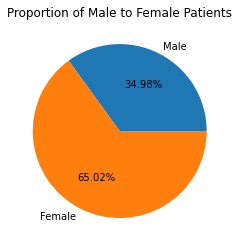

In [30]:
Male_percent = (len(Male)/len('Gender') * 100)
Female_percent = (len(Female)/len('Gender') * 100)
percent = [Male_percent, Female_percent]
sex = ['Male', 'Female']
plt.pie(percent, labels = sex, autopct = '%.2f%%' )
plt.title('Proportion of Male to Female Patients')
plt.show()

35% of the patients are Male, while 65% of the patients are Female

### Question 2  The proportion of the male and female gender that showed up and didn't showup in the clinic

<AxesSubplot:title={'center':'No Show By Gender'}, xlabel='Gender,No_show'>

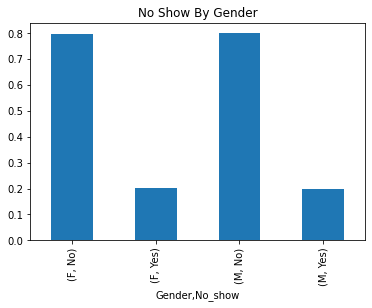

In [36]:
#we would use the group by function to filter out the gender and how they actually showed up for their appointment
df.groupby('Gender')['No_show'].value_counts(normalize = True).plot(kind = 'bar', title = 'No Show By Gender')


From the chart above, about 80% of both the male and female gender showed up for their appointment.

### Question 3: Did the difference in schedule day from appointment day affect the rate at which patients showed up? 

From going through the dataset, I discovered that some patients schedule day and appointment day were on the same day, 
while some other patients had few days apart. So let's see if that affected how patients showed up for their
appointments. 

In [39]:
# with the query function we are able to know those appointments that happened on the same day as schedule date
sameday = df.query('Scheduled_day == Appointment_day')
not_sameday = df.query('Scheduled_day != Appointment_day')

In [59]:
sameday['status'] = 'sameday'
not_sameday['status'] = 'Not_sameday'

df = sameday.append(not_sameday)
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7512\3348523383.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = sameday.append(not_sameday)


,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,status
0,29872499824296.0,5642903,F,2016-04-29 00:00:00,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,sameday
1,558997776694438.0,5642503,M,2016-04-29 00:00:00,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,sameday
2,4262962299951.0,5642549,F,2016-04-29 00:00:00,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,sameday
3,867951213174.0,5642828,F,2016-04-29 00:00:00,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,sameday
4,8841186448183.0,5642494,F,2016-04-29 00:00:00,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,sameday


In [60]:
df.drop(['status'], axis = 0, inplace = True)
df

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,status
0,29872499824296.0,5642903,F,2016-04-29 00:00:00,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,sameday
1,558997776694438.0,5642503,M,2016-04-29 00:00:00,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,sameday
2,4262962299951.0,5642549,F,2016-04-29 00:00:00,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,sameday
3,867951213174.0,5642828,F,2016-04-29 00:00:00,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,sameday
4,8841186448183.0,5642494,F,2016-04-29 00:00:00,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,sameday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 00:00:00,2016-06-07 00:00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,Not_sameday
110523,3596266328735.0,5650093,F,2016-05-03 00:00:00,2016-06-07 00:00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,Not_sameday
110524,15576631729893.0,5630692,F,2016-04-27 00:00:00,2016-06-07 00:00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,Not_sameday
110525,92134931435557.0,5630323,F,2016-04-27 00:00:00,2016-06-07 00:00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,Not_sameday


<AxesSubplot:title={'center':'Status of Appointment By No Show'}, xlabel='status,No_show'>

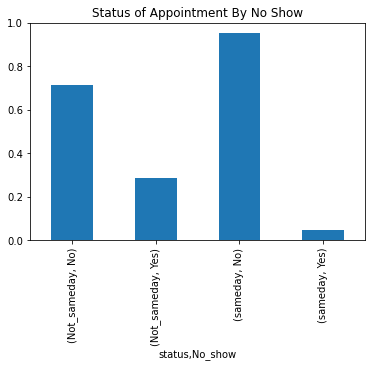

In [61]:
df.groupby('status')['No_show'].value_counts(normalize = True).plot(kind = 'bar', title = 'Status of Appointment By No Show')

From the above chart, we can see that there seems to be a positive correlation with status column and no show column. 
For patients that had their appointments the same day as the scheduled date, over 95% of them showed up as against those 
who had their appointments on a different date from the scheduled date, only a little above 75% of them showed up.

### Question 4: Did the SMS sent affected the number of patients that turned up?  

<AxesSubplot:title={'center':'SMS Received By No Show'}, xlabel='No_show,SMS_received'>

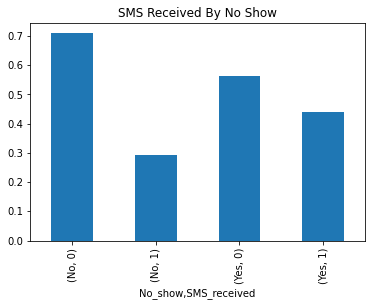

In [66]:
# we use the group by function to filter out those that got the SMS from those that didn't as well as the gender
df.groupby('No_show')['SMS_received'].value_counts(normalize = True).plot(kind = 'bar', title = 'SMS Received By No Show')

From the chart above, we can see that the number of patients that showed up but didnt get the SMS are above 70%, 
while the remained 30% got the SMS and also showed up. while we have over 40% of the patients that didn't show up but 
they got the SMS.

<a id='conclusions'></a>
## Conclusions

From our findings, we can see that we have more female patients than male patients. The number of male and female patient that showed up for their appointments are at per(equal). The SMS sent has no effect on the patients showing up, as most of the patients who showed up didnt get the SMS. One factor that we have seen that have a tentative positive effect to patients showing up for their appointments is, the schedule day and appointment day being on the same day.

One limitation that I discovered while working on the data is that the data did not contain the distance of the clinic from neighbourhoods. This would have helped to better understand if the distance is a major factor contributing to patients not showing up for their appointments.

